# Woessmann - The Importance of School System

This notebook replicates results from

L. Woessmann (2016), The Importance of School Systems: Evidence from International Differences in Student Achievement.
Journal of Economic Perspectives—Volume 30, Number 3—Summer 2016—Pages 3–32

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction

Woessmann shows in his paper that differences in student achievement across countries are systematically related to differences in organisation and governance of school systems, such as external exit exams, autonomy of course and teacher choice. In other words, the way the school system is set up matters for student performance.


**Agenda of the paper:** 

* Woessmann first describes the size and cross-test consistency of international differences in student achievement,
* then uses an education production function to describe the relation of factors of (and beyond the) respective school system to achievement differences,
* and adds a discussion and conclusion.

The education production function used by the author is given by:

$achievement_s = \alpha family + \beta resources + \gamma institutional$
    
where achievement is the student achievement by country, which is regressed on three collapsed aggregate country level variables: family background, school resources and institutional structures of the school system

## Visualization of the Identification Strategy & Issues

## Data Analysis

After a discussion of various international tests, they select the OECD PISA test with data from 2003. PISA assesses "knowledge and skills essential for full participation in our modern society" (footnote) and draws a random sample of 15year-olds in a two-stage sampling. The dataset they work with relates school system to student achievement in 29 OECD countries.

In [3]:
# Read in the data and convert .dta file to .csv
data = pd.io.stata.read_stata('data/pisa2003_oecd_jep.dta')
data.to_csv('data/pisa2003_oecd_jep.csv')

# Create pandas Dataframe
df = pd.DataFrame(data=data)

As the author focuses on three groups of input factors: family background factors, institutional factors, and school resources, the next table is created to get a nice first look at the data.

In [5]:
c_res = df[['expps', 'davailinstmat4', 'davailinstmat1', 'insttimemath', 'propcert', 'propqped']]
c_fam = df[['escs', 'age', 'female', 'dstupreprim2', 'ageprim', 'repisced1', 'repisced2', 'dgrade7', 'dgrade8', 'dgrade9', 'dgrade11', 'dgrade12', 'dliveone', 'dlivepatch', 'dliveboth', 'dworkstat4', 'dworkstat3', 'dworkstat2', 'dworkstat1', 'dhsecateg3', 'dhsecateg2', 'dhsecateg1', 'dbook2', 'dbook3', 'dbook4', 'dbook5', 'dbook6', 'dimmig2', 'dimmig3', 'dstulanguage3', 'dstulanguage4', 'dschoolloc23', 'dschoolloc4', 'dschoolloc5']]
c_ins = df[['cprivate', 'cschoolbudgetgov', 'mcentexa', 'purstudret', 'teacassprin', 'teacassextinsp', 'purcompave', 'purstudgrp', 'autstartsal', 'icautstartsal', 'autformbudget', 'icautformbudget', 'autcontent', 'icautcontent', 'authire', 'icauthire']]

# create new dataset with all the variables sorted into the higher order input factors
df_overview = pd.concat([df['pv1math'], c_res, c_fam, c_ins], axis =1, keys=['test_score', 'School resources', 'Family Background', 'Institution'])
df_overview.head()

test_score School resources                                             \
      pv1math            expps davailinstmat4 davailinstmat1 insttimemath   
0  418.086914        59.264999            0.0            0.0          0.0   
1  446.985504        59.264999            0.0            0.0        300.0   
2  501.822693        59.264999            0.0            0.0        250.0   
3  506.807892        59.264999            0.0            0.0        500.0   
4  341.828888        59.264999            0.0            0.0        200.0   

                    Family Background                ... Institution  \
  propcert propqped              escs    age female  ...  purcompave   
0      1.0     0.62         -0.758119  16.25      0  ...         0.0   
1      1.0     0.63          0.706989  15.92      0  ...         0.0   
2      1.0     0.90         -0.542674  16.00      1  ...         0.0   
3      1.0     0.68         -0.267831  15.33      1  ...         0.0   
4      1.0     0.62          0.021161  15.92      1  ...         0.0   

                                                                      \
  purstudgrp autstartsal icautstartsal autformbudget icautformbudget   
0        1.0         0.0           0.0           1.0           0.814   
1        1.0         0.0           0.0           1.0           0.814   
2        1.0         0.0           0.0           1.0           0.814   
3        1.0         0.0           0.0           1.0           0.814   
4        1.0         0.0           0.0           1.0           0.814   

                                             
  autcontent icautcontent authire icauthire  
0        1.0        0.814     0.0       0.0  
1        1.0        0.814     0.0       0.0  
2        1.0        0.814     0.0       0.0  
3        1.0        0.814     0.0       0.0  
4        1.0        0.814     0.0       0.0  

[5 rows x 57 columns]

The PISA test draws a random sample of 15-year-olds to take it; let's look at the age distribution in the data.

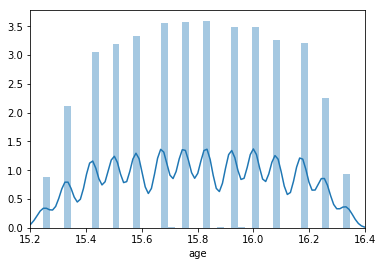

In [7]:
columns = ['age']
for column in columns:
    nonzero_entries = df[column].where(df[column] > 0).dropna()
    ax = sns.distplot(nonzero_entries)
    ax.set_xlim(15.2, 16.4)
    plt.show()  

Apparently, 16-year-olds classify as 15 with PISA. There might be some time difference between selection and test-taking... Need to read up on this.

Also interesting: the distribution between male and female test-takers and the distribution of test scores.

C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


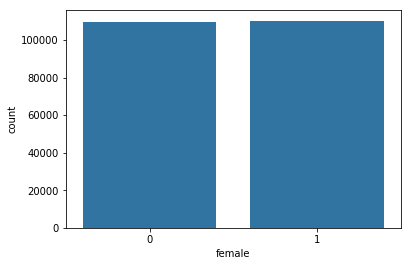

C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


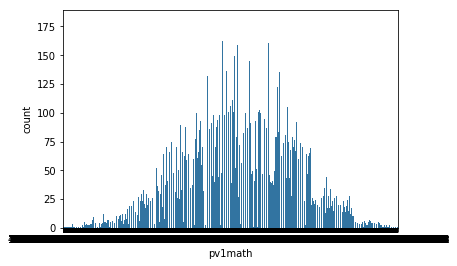

In [8]:
columns = ['female', 'pv1math']
for column in columns:
    sns.countplot(df[column], color="#1f77b4")
    plt.show()

The number of male/female test takers is pretty equal. The math test scores measured by 'pv1math' looks pretty normally distributed, though I have to do something with the labelling of the x-axis.

## Replication